You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,r2_score

In [2]:
sigmoid = lambda x: 1/(1+np.exp(-x))

In [3]:
x_l = np.load("X.npy") # image
y_l = np.load("Y.npy") # label


In [4]:
X_train, X_test, y_train, y_test  = train_test_split(x_l.reshape((-1,4096)),y_l,test_size=0.3,random_state=42)

In [5]:
class LogisticReg():
    def __init__(self):
        pass
    def train(self,X,y,step_size=0.001,iters=5,batch_size=10):
        self.weights = np.random.randn(X.shape[1])
        #self.weights = np.zeros(X.shape[1])
        self.bias = np.random.randn()
        self.step_size = step_size
        pbar = tqdm(total = iters)
        for iter_n in range(iters):
            loss = 0
            for idx,x in enumerate(X):
                curr = sigmoid(self.weights@x + self.bias)
                loss += (curr - y[idx])
                if (idx+1) == X.shape[0] or (idx+1)%batch_size == 0:
                    loss = loss/batch_size
                    self.weights = self.weights - self.step_size*(loss*x)
                    self.bias = self.bias - self.step_size*loss
                    loss = 0
            pbar.update(1)
        pbar.close()
    def predict(self,X):
        y = np.zeros(X.shape[0])
        for idx,x in enumerate(X):
            y[idx] = sigmoid(self.weights@x + self.bias)
        return y

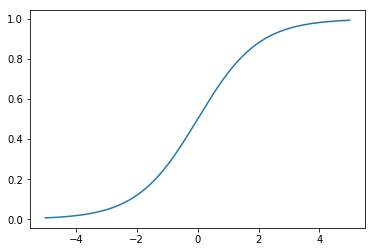

In [6]:
plt.plot(np.arange(-5,5,0.01),sigmoid(np.arange(-5,5,0.01)))
plt.show()

In [7]:
regressors = list()
for i in range(y_train.shape[1]):
    regressors.append(LogisticReg())

In [8]:
for i in range(y_train.shape[1]):
    regressors[i].train(X_train,y_train[:,i],step_size=0.015,iters=500, batch_size= 1)

In [9]:
preds = np.zeros((X_test.shape[0],y_test.shape[1]))
for i in range(y_test.shape[1]):
    preds[:,i] = regressors[i].predict(X_test)
preds = np.exp(preds)/np.sum(np.exp(preds),axis=1)[:,None]

In [10]:
preds_ovr = np.argmax(preds,axis=1)

In [11]:
accuracy_score(np.argmax(y_test,axis=1).reshape(-1,1),np.argmax(preds,axis=1).reshape(-1,1))

0.6817447495961227

In [12]:
regressors_ovo = dict()
num_classes = y_train.shape[1]
for i in range(num_classes):
    for j in range(i+1,num_classes):
        regressors_ovo[str(i)+'_'+str(j)] = LogisticReg()

In [13]:
for idx, tup in enumerate(regressors_ovo.items()):
    cclasses = [ int(x) for x in tup[0].split('_')]
    mask = (y_train[:,cclasses[0]] == 1) | (y_train[:,cclasses[1]] == 1)
    X_train_ = X_train[mask]
    y_train_ = y_train[mask][:,cclasses[1]]
    tup[1].train(X_train_,y_train_,step_size=0.02,iters=500, batch_size= 1)

In [14]:
preds = np.zeros((X_test.shape[0],len(regressors_ovo.items())))
for idx, tup in enumerate(regressors_ovo.items()):
    cclasses = [ int(x) for x in tup[0].split('_')]
    preds_01 = tup[1].predict(X_test)
    preds[preds_01 <= 0.5,idx] = cclasses[0]
    preds[preds_01 >0.5,idx] = cclasses[1]

In [15]:
from scipy.stats import mode

In [16]:
final_preds = mode(preds,1)[0].reshape(-1)

In [17]:
accuracy_score(np.argmax(y_test,axis=1).reshape(-1,1),final_preds)

0.7463651050080775

One vs All Logistic Regression
Accuracy: 0.6817447495961227
R squared: 0.3493415269350659
F1 Score: 0.6817447495961227
Confusion Matrix:


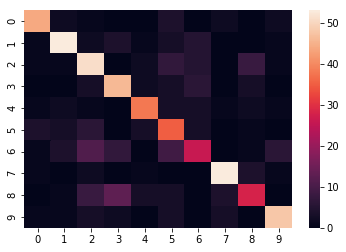

In [18]:
print('One vs All Logistic Regression')
print('Accuracy:',accuracy_score(np.argmax(y_test,axis=1),preds_ovr))
print('R squared:',r2_score(np.argmax(y_test,axis=1),preds_ovr))
print('F1 Score:',f1_score(np.argmax(y_test,axis=1),preds_ovr,average='micro'))
print('Confusion Matrix:')
sns.heatmap(confusion_matrix(np.argmax(y_test,axis=1),preds_ovr))
plt.show()

One vs One Logistic Regression
Accuracy: 0.7463651050080775
R squared: 0.5107845725198168
F1 Score: 0.7463651050080776
Confusion Matrix:


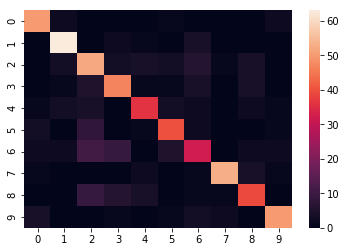

In [19]:
print('One vs One Logistic Regression')
print('Accuracy:',accuracy_score(np.argmax(y_test,axis=1),final_preds))
print('R squared:',r2_score(np.argmax(y_test,axis=1),final_preds))
print('F1 Score:',f1_score(np.argmax(y_test,axis=1),final_preds,average='micro'))
print('Confusion Matrix:')
sns.heatmap(confusion_matrix(np.argmax(y_test,axis=1),final_preds))
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42).fit(X_train, np.argmax(y_train,axis=1))

preds_inbuilt = clf.predict(X_test)

/home/varunc/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Inbuilt One vs All Logistic Regression
Accuracy: 0.7350565428109854
R squared: 0.437490211630856
F1 Score: 0.7350565428109855
Confusion Matrix:


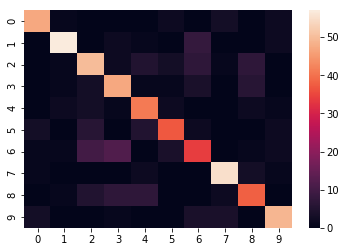

In [21]:
print('Inbuilt One vs All Logistic Regression')
print('Accuracy:',accuracy_score(np.argmax(y_test,axis=1),preds_inbuilt))
print('R squared:',r2_score(np.argmax(y_test,axis=1),preds_inbuilt))
print('F1 Score:',f1_score(np.argmax(y_test,axis=1),preds_inbuilt,average='micro'))
print('Confusion Matrix:')
sns.heatmap(confusion_matrix(np.argmax(y_test,axis=1),preds_inbuilt))
plt.show()

In [22]:
from sklearn.multiclass import OneVsOneClassifier

Inbuilt One vs One Logistic Regression
Accuracy: 0.8012924071082391
R squared: 0.6001059669898302
F1 Score: 0.8012924071082392
Confusion Matrix:


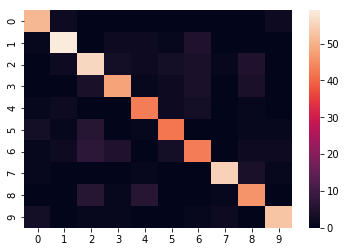

In [23]:
clf = OneVsOneClassifier(LogisticRegression(random_state=42),n_jobs=5).fit(X_train, np.argmax(y_train,axis=1))

preds_inbuilt = clf.predict(X_test)
print('Inbuilt One vs One Logistic Regression')
print('Accuracy:',accuracy_score(np.argmax(y_test,axis=1),preds_inbuilt))
print('R squared:',r2_score(np.argmax(y_test,axis=1),preds_inbuilt))
print('F1 Score:',f1_score(np.argmax(y_test,axis=1),preds_inbuilt,average='micro'))
print('Confusion Matrix:')
sns.heatmap(confusion_matrix(np.argmax(y_test,axis=1),preds_inbuilt))
plt.show()